In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

In [9]:
from src.processing import *

## processing

#### Raw image

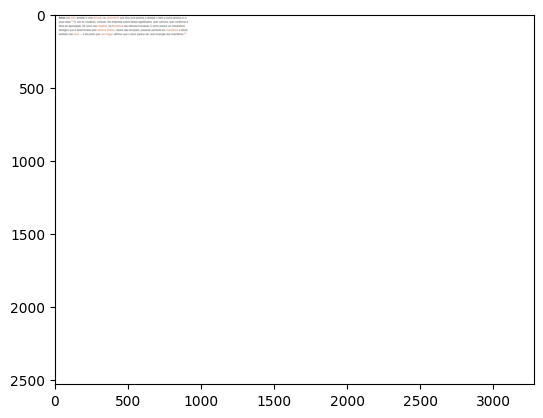

In [10]:
img = read_img()
show(img)

### Processing

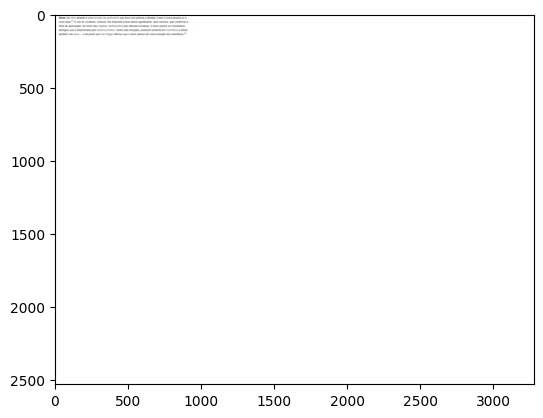

In [11]:
grey = greyscale(img)
gauss = gaussian(grey, 3, 3)

show(gauss)

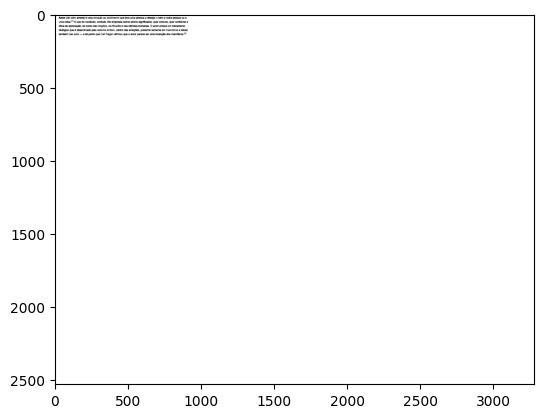

In [12]:
thres = thresholding(gauss)
#thres = gaussian_thresholding(grey)

show(thres)

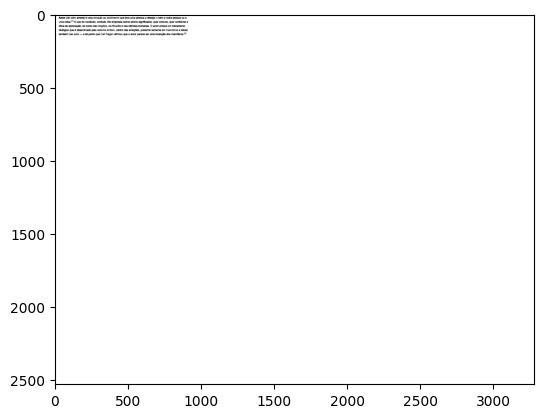

In [13]:
processed = thres
processed = erode(processed, iterations=1)

show(processed)

## Character Segmentation

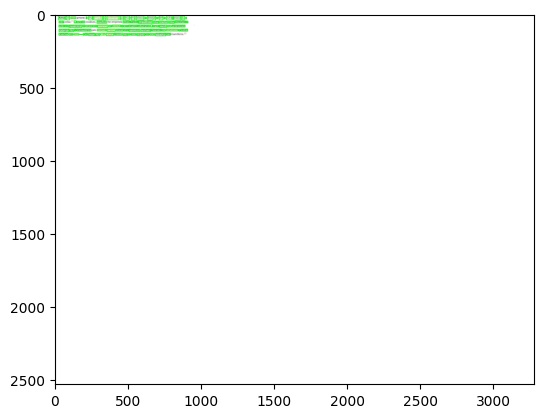

In [14]:
show(get_word_boxes(processed.copy(), (0, 255, 0), img=img.copy()))

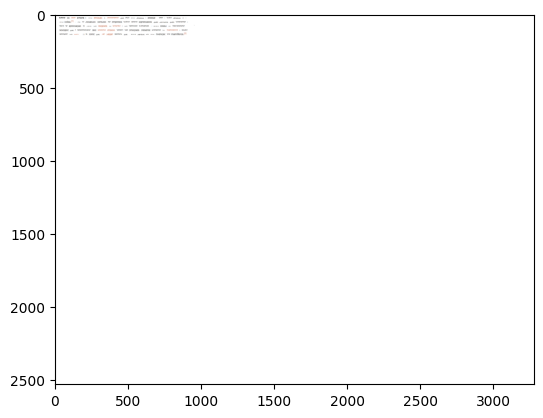

In [15]:
show(get_word_boxes(img.copy(), (255,255,255)))

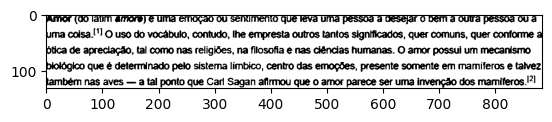

'Amor (do latim amores) é uma emoção ou sentimento que leva uma pessoa a desejar o bem à outra pessoa ou a\numa coisa.] O uso do vocábulo, contudo, lhe empresta outros tantos significados, quer comuns, quer conforme a\nótica de apreciação, tal como nas religiões, na filosofia e nas ciências humanas. O amor possui um mecanismo\nbiológico que é determinado pelo sistema limbico, centro das emoções, presente somente em mamiferos e talvez\ntambém nas aves — a tal ponto que Carl Sagan afirmou que o amor parece ser uma invenção dos mamiferos.!2]\n'

In [16]:
img_dict = get_data(processed)
segments = list()
segments_txt = list()

for i in range(len(img_dict['text'])):
    (x, y, w, h) = (img_dict['left'][i], img_dict['top'][i], img_dict['width'][i], img_dict['height'][i])
    crop_img = processed[y:y+h, x:x+w]
    if img_dict['level'][i] == 2:
        segments.append(crop_img)
        show(crop_img)
        #print(img_dict['text'][i])
        segment_txt = ocr(crop_img)
        segments_txt.append(segment_txt)
        # print(segment_txt)
        
segments_txt.pop()

## OCRing

In [17]:
raw_text = ocr(img)
processed_text = ocr(processed)
segmented_text = ' '.join(segments_txt)

## Postprocessing

### Raw image text

In [18]:
raw_text_pp = remove_double_spaces(' '.join(remove_special(raw_text)))
raw_text_pp = remove_single_letters(raw_text_pp, keep_e=True, keep_a=True)
print(raw_text_pp)

Amor do latim amore é uma emoção ou sentimento que leva uma pessoa a desejar  bem a outra pessoa ou a uma coisa  uso do vocábulo contudo lhe empresta outros tantos significados quer comuns quer conforme a ótica de apreciação tal como nas religiões na filosofia e nas ciências humanas  amor possui um mecanismo biológico que é determinado pelo sistema límbico centro das emoções presente somente em mamíferos e talvez também nas aves a tal ponto que Carl Sagan afirmou que  amor parece ser uma invenção dos mamiíferos2 


### Processed image text

In [19]:
processed_text_pp = remove_double_spaces(' '.join(remove_special(processed_text, keep_dot_comma=True)))
processed_text_pp = remove_single_letters(processed_text_pp, keep_e=True, keep_a=True, keep_o=True)
print(processed_text_pp)

Amor do latim amore é uma emoção ou sentimento que leva uma pessoa a desejar o bem à outra pessoa ou a uma coisa. O uso do vocâábulo, contudo, lhe ernpresta outros tantos significados, quer comuns, quer conforme a ótica de apreciação, tal como nas religiões, na filosofia e nas ciências humanas. O amor possui um mecanismo biológico que é determinado pelo sistema limbico, centro das emoções, presente somente em mamiíferos e talvez também nas aves a tal ponto que Carl Sagan afirmou que o amor parece ser uma invenção dos marniferos. 


### Processed and Segmented image text

In [20]:
segmented_text = remove_breaks(segmented_text, add_space=True)
segmented_text = remove_double_spaces(segmented_text)
segmented_text = remove_single_letters(segmented_text)
print(segmented_text)